In [2]:
# Importing the related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read the csv file from dataset
customer_churn = pd.read_csv("customer_churn.csv")
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
c_5 = customer_churn.iloc[:5]

In [4]:
c_15 = customer_churn.iloc[:15]

In [5]:
senior_male_electronics = customer_churn[(customer_churn['gender']=="Male") & (customer_churn['SeniorCitizen']==1) & (customer_churn['PaymentMethod']=="Electronic check")]

In [6]:
customer_total_tenure = customer_churn[(customer_churn['tenure']>70) | (customer_churn["MonthlyCharges"]>100)]

In [7]:
two_mail_yes = customer_churn[(customer_churn['Contract']=="Two year") & (customer_churn['PaymentMethod']=="Mailed check") & (customer_churn['Churn']=="Yes")]

In [8]:
customer_333 = customer_churn.sample(n=333)

In [5]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
#--------------------------------------Data Visualization---------------------------------

Text(0.5, 1.0, 'Distribution of Internet Service')

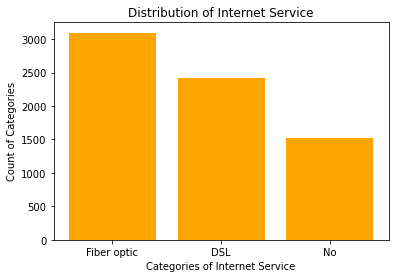

In [11]:
x = customer_churn['InternetService'].value_counts().keys().tolist()
y = customer_churn['InternetService'].value_counts().tolist()
plt.bar(x, y, color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel('Count of Categories')
plt.title("Distribution of Internet Service")

Text(0.5, 1.0, 'Distribution of tenur')

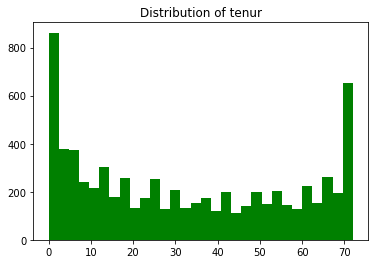

In [12]:
plt.hist(customer_churn['tenure'], color='green', bins=30)
plt.title('Distribution of tenur')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

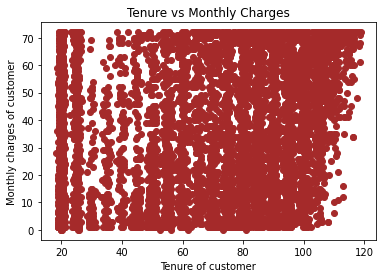

In [13]:
plt.scatter(customer_churn['MonthlyCharges'], customer_churn['tenure'], color="brown")
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly charges of customer')
plt.title('Tenure vs Monthly Charges')

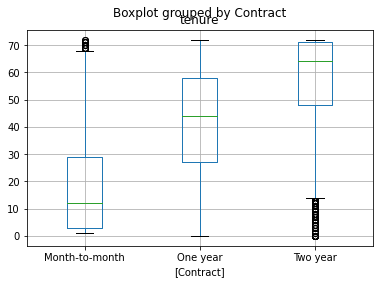

In [14]:
customer_churn.boxplot(column='tenure', by=['Contract'])

In [15]:
#----------------Implement Linear Regression-------------------------

In [7]:
# Importing libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [8]:
# Preparing Data sets
x = pd.DataFrame(customer_churn['tenure'])
y = pd.DataFrame(customer_churn['MonthlyCharges'])

In [9]:
# Split datasets into trining and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

In [10]:
# Building the model
from sklearn.linear_model import LinearRegression
simpleLR = LinearRegression()

In [11]:
# Fit the model
simpleLR.fit(x_train, y_train)

LinearRegression()

In [12]:
# Predict the value
y_pred = simpleLR.predict(x_test)

In [13]:
# Find Root mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

In [23]:
#-----------------------------------Implement Logistic Regression-----------------------------

In [26]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
# Prepare data sets
x = pd.DataFrame(customer_churn['MonthlyCharges'])
y = pd.DataFrame(customer_churn['Churn'])

In [28]:
# datsets split into training and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [29]:
# fit the model
logModel = LogisticRegression()
logModel.fit(x_train, y_train)

c:\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [30]:
# Predict the values
y_pred = logModel.predict(x_test)

In [31]:
# test the matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_pred, y_test), accuracy_score(y_pred, y_test)

(array([[1815,  651],
        [   0,    0]], dtype=int64),
 0.7360097323600974)

In [32]:
#---------------------Implement Logistic Regression for Multiple labels------------------------
#Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
# Prepare Datasets
x = pd.DataFrame(customer_churn.loc[:, ['tenure','MonthlyCharges']])
y = pd.DataFrame(customer_churn['Churn'])

In [34]:
# Split Data sets into Training & Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [35]:
# Fit into model
logModel = LogisticRegression()
logModel.fit(x_train, y_train)
y_pred = logModel.predict(x_test)

c:\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[934, 107],
        [212, 156]], dtype=int64),
 0.7735982966643009)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.90      0.85      1041
         Yes       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



In [38]:
#--------------------Implement Decision Tree---------------------------------
x = pd.DataFrame(customer_churn['tenure'])
y = customer_churn['Churn']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
classifier = DecisionTreeClassifier()

In [43]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [46]:
confusion_matrix(y_test, y_pred)

array([[951,  78],
       [265, 115]], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred)

0.7565649396735273

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.78      0.92      0.85      1029
         Yes       0.60      0.30      0.40       380

    accuracy                           0.76      1409
   macro avg       0.69      0.61      0.62      1409
weighted avg       0.73      0.76      0.73      1409



In [46]:
#--------------------------------Implement Random Forest Model------------------------------

In [49]:
x = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30)

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [52]:
from sklearn import metrics as mt

In [53]:
print("ACcuracy is", mt.accuracy_score(y_test, y_pred))

ACcuracy is 0.8666666666666667


In [54]:
import pickle

In [55]:
# Saving model to disk
pickle.dump(clf, open('model.pkl','wb'))

In [58]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[10, 72]]))

['Yes']


In [68]:
# Saving model to disk
pickle.dump(simpleLR, open('model.pkl','wb'))

In [70]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[10]]))

[[58.31014881]]
